# Neural Network Classification Example

In [1]:
from sklearn.neural_network import MLPClassifier
import scipy.io as sio
import numpy.matlib as mat
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] (150, 2)


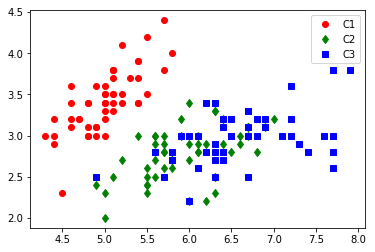

In [54]:
data = sio.loadmat('fisheriris.mat')
X = data['meas']
X = X[:,:2]
T = np.concatenate((np.array(mat.repmat([0],50,1)),np.array(mat.repmat([1],50,1)),np.array(mat.repmat([2],50,1))),axis = 0)
targets = np.ravel(T)
print(targets,X.shape)
plt.plot(X[:50,0],X[:50,1],'or')
plt.plot(X[50:101,0],X[50:101,1],'dg')
plt.plot(X[101:,0],X[101:,1],'sb')
plt.legend(('C1','C2','C3'))

In [55]:
MLPClassifier?

In [56]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=1)
clf.fit(X, targets)  
Ws = clf.coefs_
print(np.shape(Ws[0]))
print(np.shape(Ws[1]))



(2, 15)
(15, 3)


In [57]:
y_pred = clf.predict(X)
from sklearn.metrics import confusion_matrix
cMat = confusion_matrix(targets, y_pred)
cMat.view()

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 13, 37]])

In [70]:
# Ejemplo con una svm
from sklearn import svm

model = svm.SVC()
model.fit(X,targets)
y_pred = model.predict(X)
cMat = confusion_matrix(targets, y_pred)
print(cMat)

[[50  0  0]
 [ 0 38 12]
 [ 0 14 36]]


# Neural Network Regresion Example

In [30]:
import numpy as np
from sklearn.neural_network import MLPRegressor
data = sio.loadmat('simpleFitdataset.mat')
x = data['x']
t = data['t']

print(x.shape,t.shape)
a,b = t.shape
tr = t+0.1*np.random.rand(1,b)
clf = MLPRegressor(solver='adam', alpha=1e-3,hidden_layer_sizes=(10,2,10), random_state=1)
clf.fit(x,tr)  


(1, 94) (1, 94)


C:\Anaconda\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [31]:
y_pred = clf.predict(x)
from sklearn.metrics import r2_score
print(tr)

[[  5.05588208   5.37317331   5.72085779   6.00430746   6.33786947
    6.66937131   6.96411334   7.29741894   7.57733099   7.98091837
    8.27752589   8.5967851    8.91548633   9.21594817   9.4742499
    9.71381237   9.92717872  10.03152533  10.0247367    9.90367794
    9.76364827   9.52478509   9.25306729   9.05253572   8.73066837
    8.52286717   8.24485579   8.01799173   7.83706059   7.68626969
    7.58127847   7.46866246   7.35434918   7.28403733   7.16246109
    7.15450943   7.08677281   7.14727891   7.20798145   7.22769096
    7.37492888   7.51793742   7.61024643   7.74392774   7.91153014
    8.04432575   8.13035075   8.21702361   8.23065561   8.03745438
    7.76892848   7.48162646   7.16251616   6.89190098   6.52540722
    6.26346689   5.99700531   5.60048518   5.354378     4.95923461
    4.65908154   4.33254989   4.04282593   3.77094511   3.47649162
    3.13358335   2.80621958   2.42775252   2.17903001   1.83763815
    1.54369031   1.19739419   0.90012656   0.57129363   0.32948

In [32]:
print('R2=',r2_score(tr[0],y_pred[0]))

R2= 0.995497110669


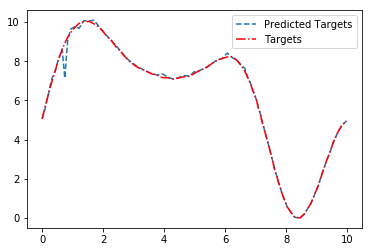

In [33]:

plt.plot(x[0],y_pred[0],'--')
plt.plot(x[0],tr[0],'-.r')
plt.legend({'Targets','Predicted Targets'})
plt.show()
